##

Atividade LEA - Vinicius Eiji 770276

In [ ]:
%pip install beautifulsoup4
%pip install requests
%pip install matplotlib


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import locale
import sys
!{sys.executable} -m pip install requests beautifulsoup4

import json
import pathlib
from collections import defaultdict, Counter
import matplotlib.pyplot as plt


In [ ]:
url = "https://anda.ibge.gov.br/agencia-noticias.html?start=0"

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/129.0.0.0 Safari/537.36",
}


In [ ]:
response = requests.get(url, headers=headers)
response
# <Response [200]> -> requisição foi bem-sucedida 

<Response [200]>

In [ ]:
soup = BeautifulSoup(response.text, "html.parser")

In [ ]:
soup


<!DOCTYPE HTML>

<html lang="pt-BR">
<head>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<!-- Global site tag (gtag.js) - Google Analytics -->
<link crossorigin="crossorigin" href="https://www.googletagmanager.com" rel="preconnect"/>
<script async="" src="https://www.googletagmanager.com/gtag/js?id=UA-285486-1"></script>
<script>
    window.dataLayer = window.dataLayer || [];
    function gtag(){dataLayer.push(arguments);}
    gtag('js', new Date());

    gtag('config', 'UA-285486-1');
    
        
</script>
<!-- Fim de Google Analytics -->
<!-- Google Tag Manager -->
<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
})(window,document,'script','dataLayer','GTM-5X

In [ ]:
# Exibe o html como texto
print(soup.get_text())


















Notícias | Agência de Notícias
























































Portal do Governo Brasileiro






















 



 



 




Twitter



















HomeNotíciasReleasesComunicadosMinuto IBGEPróximas divulgaçõesAcervo







 








Nossos serviços estão apresentando instabilidade no momento. Algumas informações podem não estar disponíveis.










Editorias

Todas
Estatísticas Sociais
Estatísticas Econômicas
Geociências
IBGE
Revista Retratos
Séries Especiais




Data


2024
2023
2022
2021
2020
2019
2018
2017


Mês
01
02
03
04
05
06
07
08
09
10
11
12









IPCA-15Prévia da inflação tem alta de 0,34% em dezembro e fecha 2024 em 4,71%



Receba notícias ou releases sobre os temas de seu interesse





RSS








 



IPCA-15
Prévia da inflação tem alta de 0,34% em dezembro e fecha 2024 em 4,71% 27/12/2024
	
							O Índice Nacional de Preços ao Consumidor Amplo (IPCA) 15 apresentou alta de 0,34% em dezembro, e fechou o ano de 2024 

In [ ]:
# Localizando o bloco com o id "textoMateria"
bloco_noticias = soup.find_all("div", class_="lista-noticias__item")

bloco_noticias

[<div class="lista-noticias__item pure-g">
 <div class="lista-noticias__foto pure-u-md-5-24 pure-u-1">
 <a href="/agencia-noticias/2012-agencia-de-noticias/noticias/42319-previa-da-inflacao-tem-alta-de-0-34-em-dezembro-e-fecha-2024-em-4-71">
 <img src="/images/agenciadenoticias/estatisticas_economicas/2024_12/IPCA15_THUMB_Daiane-Mendona-SECOM-RO.jpg"/> </a>
 </div>
 <div class="lista-noticias__texto pure-u-md-19-24 pure-u-1">
 <a href="/agencia-noticias/2012-agencia-de-noticias/noticias/42319-previa-da-inflacao-tem-alta-de-0-34-em-dezembro-e-fecha-2024-em-4-71">
 <p class="lista-noticias__subeditoria">IPCA-15</p>
 <h3>Prévia da inflação tem alta de 0,34% em dezembro e fecha 2024 em 4,71% <span class="lista-noticias__data">27/12/2024</span></h3>
 <p class="mod-articles-category-introtext">	
 							O Índice Nacional de Preços ao Consumidor Amplo (IPCA) 15 apresentou alta de 0,34% em dezembro, e fechou o ano de 2024 com variação acumulada de...						</p>
 </a>
 <!--<ul class="lista-notic

In [ ]:
# Extraindo os links sem duplicatas usando um set
links = {a['href'] for bloco in bloco_noticias for a in bloco.find_all('a', href=True)}

# Thiago, tive que fazer assim pra evitar links duplicados
links = list(links)

# Exibindo os links extraídos
for link in links:
    print(link)


/agencia-noticias/2012-agencia-de-noticias/noticias/42193-segundo-prognostico-para-a-safra-de-2025-preve-crescimento-de-7-0-frente-a-2024
/agencia-noticias/2012-agencia-de-noticias/noticias/42277-censo-2022-mais-da-metade-da-populacao-indigena-vive-nas-cidades
/agencia-noticias/2012-agencia-de-noticias/noticias/42190-agenda-ibge-reune-mais-de-22-mil-eventos-cadastrados-em-2024
/agencia-noticias/2012-agencia-de-noticias/noticias/42319-previa-da-inflacao-tem-alta-de-0-34-em-dezembro-e-fecha-2024-em-4-71
/agencia-noticias/2012-agencia-de-noticias/noticias/42278-censo-2022-brasil-tem-mais-de-8-5-mil-localidades-indigenas-a-maioria-na-regiao-norte
/agencia-noticias/2012-agencia-de-noticias/noticias/42251-ibge-divulga-atualizacao-anual-das-estruturas-territoriais-do-pais
/agencia-noticias/2012-agencia-de-noticias/noticias/42242-pesquisas-do-ibge-retratam-a-rede-urbana-do-pais-ha-quase-seis-decadas
/agencia-noticias/2012-agencia-de-noticias/noticias/42230-oficina-um-territorio-de-informacoes-

In [ ]:
links = [link for link in links if "/agencia-noticias/" in link]

for link in links:
    print(link)

/agencia-noticias/2012-agencia-de-noticias/noticias/42193-segundo-prognostico-para-a-safra-de-2025-preve-crescimento-de-7-0-frente-a-2024
/agencia-noticias/2012-agencia-de-noticias/noticias/42277-censo-2022-mais-da-metade-da-populacao-indigena-vive-nas-cidades
/agencia-noticias/2012-agencia-de-noticias/noticias/42190-agenda-ibge-reune-mais-de-22-mil-eventos-cadastrados-em-2024
/agencia-noticias/2012-agencia-de-noticias/noticias/42319-previa-da-inflacao-tem-alta-de-0-34-em-dezembro-e-fecha-2024-em-4-71
/agencia-noticias/2012-agencia-de-noticias/noticias/42278-censo-2022-brasil-tem-mais-de-8-5-mil-localidades-indigenas-a-maioria-na-regiao-norte
/agencia-noticias/2012-agencia-de-noticias/noticias/42251-ibge-divulga-atualizacao-anual-das-estruturas-territoriais-do-pais
/agencia-noticias/2012-agencia-de-noticias/noticias/42242-pesquisas-do-ibge-retratam-a-rede-urbana-do-pais-ha-quase-seis-decadas
/agencia-noticias/2012-agencia-de-noticias/noticias/42230-oficina-um-territorio-de-informacoes-

In [ ]:
base_url = "https://anda.ibge.gov.br"

# Acessando cada link completo

full_url = base_url + links[0]  # Construindo a URL completa
response = requests.get(full_url, headers=headers)

full_url

'https://anda.ibge.gov.br/agencia-noticias/2012-agencia-de-noticias/noticias/42193-segundo-prognostico-para-a-safra-de-2025-preve-crescimento-de-7-0-frente-a-2024'

In [ ]:
soup = BeautifulSoup(response.text, "html.parser")
soup


<!DOCTYPE HTML>

<html lang="pt-BR">
<head>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<!-- Global site tag (gtag.js) - Google Analytics -->
<link crossorigin="crossorigin" href="https://www.googletagmanager.com" rel="preconnect"/>
<script async="" src="https://www.googletagmanager.com/gtag/js?id=UA-285486-1"></script>
<script>
    window.dataLayer = window.dataLayer || [];
    function gtag(){dataLayer.push(arguments);}
    gtag('js', new Date());

    gtag('config', 'UA-285486-1');
    
        
</script>
<!-- Fim de Google Analytics -->
<!-- Google Tag Manager -->
<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
})(window,document,'script','dataLayer','GTM-5X

In [ ]:
soup = BeautifulSoup(response.text, "html.parser")

print(soup.get_text(separator="\n").strip())

























































Segundo prognóstico para a safra de 2025 prevê crescimento de 7,0% frente a 2024 | Agência de Notícias




















































































































Portal do Governo Brasileiro














































 








 








 










Twitter








































Home
Notícias
Releases
Comunicados
Minuto IBGE
Próximas divulgações
Acervo
















 


















Nossos serviços estão apresentando instabilidade no momento. Algumas informações podem não estar disponíveis.
























Produção agrícola





				
				Segundo prognóstico para a safra de 2025 prevê crescimento de 7,0% frente a 2024 		
			




				
										Editoria: 							
Estatísticas Econômicas


  |  Breno Siqueira






















12/12/2024 09h00  | Atualizado em 13/12/2024 11h29










Produção de algodão herbáceo tem cresci

In [ ]:
# Extraindo o título
title = soup.find("meta", property="og:title")["content"]

# Extraindo a descrição
description = soup.find("meta", attrs={"name": "description"})["content"]


date = soup.find("meta", property="article:modified_time")["content"]

# Exibindo os resultados
print("Título:", title)
print("Descrição:", description)
print("Data:", date)

Título: Segundo prognóstico para a safra de 2025 prevê crescimento de 7,0% frente a 2024 | Agência de Notícias
Descrição: O Levantamento Sistemático da Produção Agrícola (LSPA), divulgado hoje (12) pelo IBGE, mostra que a safra nacional de...
Data: 2024-12-13T14:29:34+00:00


In [ ]:
informacoes = {
    "titulo": title,
    "descricao": description,
    "data": date,
}

informacoes

{'titulo': 'Segundo prognóstico para a safra de 2025 prevê crescimento de 7,0% frente a 2024 | Agência de Notícias',
 'descricao': 'O Levantamento Sistemático da Produção Agrícola (LSPA), divulgado hoje (12) pelo IBGE, mostra que a safra nacional de...',
 'data': '2024-12-13T14:29:34+00:00'}

In [ ]:
import time
import random

In [ ]:
numero_paginas = 120
# numero_paginas = 10

links_noticias = []

for p in range(numero_paginas):
    start_value = p * 20
    url = f"https://anda.ibge.gov.br/agencia-noticias.html?start={start_value}"
    response = requests.get(url, headers=headers)

    print(p, response)
    
    soup = BeautifulSoup(response.text, "html.parser")
    bloco_noticias = soup.find_all("div", class_="lista-noticias__item")
    links = {a['href'] for bloco in bloco_noticias for a in bloco.find_all('a', href=True)}
    links = [link for link in links if "/agencia-noticias/" in link]

    links_noticias += links

    # Esperar alguns segundos antes de ir para a próxima página
    tempo_espera = random.uniform(0, 0.01)
    time.sleep(tempo_espera)


0 <Response [200]>
1 <Response [200]>
2 <Response [200]>
3 <Response [200]>
4 <Response [200]>
5 <Response [200]>
6 <Response [200]>
7 <Response [200]>
8 <Response [200]>
9 <Response [200]>
10 <Response [200]>
11 <Response [200]>
12 <Response [200]>
13 <Response [200]>
14 <Response [200]>
15 <Response [200]>
16 <Response [200]>
17 <Response [200]>
18 <Response [200]>
19 <Response [200]>
20 <Response [200]>
21 <Response [200]>
22 <Response [200]>
23 <Response [200]>
24 <Response [200]>
25 <Response [200]>
26 <Response [200]>
27 <Response [200]>
28 <Response [200]>
29 <Response [200]>
30 <Response [200]>
31 <Response [200]>
32 <Response [200]>
33 <Response [200]>
34 <Response [200]>
35 <Response [200]>
36 <Response [200]>
37 <Response [200]>
38 <Response [200]>
39 <Response [200]>
40 <Response [200]>
41 <Response [200]>
42 <Response [200]>
43 <Response [200]>
44 <Response [200]>
45 <Response [200]>
46 <Response [200]>
47 <Response [200]>
48 <Response [200]>
49 <Response [200]>
50 <Respon

In [ ]:
len(links_noticias)

2364

In [ ]:
data_dir = pathlib.Path("data")  # Diretório onde os arquivos serão salvos
data_dir.mkdir(exist_ok=True) 

for i, link in enumerate(links_noticias):
    base_url = "https://anda.ibge.gov.br"

    full_url = base_url + link  # Construindo a URL completa
    response = requests.get(full_url, headers=headers)

    soup = BeautifulSoup(response.text, "html.parser")

    # Extraindo o título
    title = soup.find("meta", property="og:title")["content"]

    # Extraindo a descrição
    description = soup.find("meta", attrs={"name": "description"})["content"]


    date = soup.find("meta", property="article:modified_time")["content"]
    

    informacoes = {
        "url": full_url,
        "titulo": title,
        "descricao": description,
        "data": date,
    }
    
    filename = f"noticia_{i}.json"
    
    file_path = data_dir / filename

    with file_path.open("w", encoding="utf-8") as f:
        json.dump(informacoes, f, ensure_ascii=False, indent=4)
    
    print(f"Arquivo salvo: {file_path}")
    # tempo_espera = random.uniform(0, .5)
    time.sleep(tempo_espera)  

Arquivo salvo: data/noticia_0.json
Arquivo salvo: data/noticia_1.json
Arquivo salvo: data/noticia_2.json
Arquivo salvo: data/noticia_3.json
Arquivo salvo: data/noticia_4.json
Arquivo salvo: data/noticia_5.json
Arquivo salvo: data/noticia_6.json
Arquivo salvo: data/noticia_7.json
Arquivo salvo: data/noticia_8.json
Arquivo salvo: data/noticia_9.json
Arquivo salvo: data/noticia_10.json
Arquivo salvo: data/noticia_11.json
Arquivo salvo: data/noticia_12.json
Arquivo salvo: data/noticia_13.json
Arquivo salvo: data/noticia_14.json
Arquivo salvo: data/noticia_15.json
Arquivo salvo: data/noticia_16.json
Arquivo salvo: data/noticia_17.json
Arquivo salvo: data/noticia_18.json
Arquivo salvo: data/noticia_19.json
Arquivo salvo: data/noticia_20.json
Arquivo salvo: data/noticia_21.json
Arquivo salvo: data/noticia_22.json
Arquivo salvo: data/noticia_23.json
Arquivo salvo: data/noticia_24.json
Arquivo salvo: data/noticia_25.json
Arquivo salvo: data/noticia_26.json
Arquivo salvo: data/noticia_27.json
Ar

Datas processadas: ['2024-05-10T12:37:39+00:00', '2020-02-20T22:09:26+00:00', '2023-08-24T13:02:46+00:00', '2021-07-23T12:05:12+00:00', '2019-08-02T20:49:32+00:00', '2019-01-24T13:01:57+00:00', '2024-07-31T20:47:39+00:00', '2019-08-08T11:55:09+00:00', '2023-09-22T12:55:05+00:00', '2021-04-28T12:20:18+00:00', '2019-01-08T10:51:56+00:00', '2017-09-13T12:32:28+00:00', '2021-09-30T15:11:32+00:00', '2024-10-21T21:46:13+00:00', '2022-02-09T12:02:29+00:00', '2024-04-18T21:38:09+00:00', '2020-07-30T16:39:29+00:00', '2020-07-09T22:47:20+00:00', '2017-07-31T13:05:28+00:00', '2023-04-26T12:47:37+00:00', '2021-09-30T13:14:02+00:00', '2024-06-12T12:43:32+00:00', '2019-12-06T12:53:15+00:00', '2023-10-25T12:21:08+00:00', '2021-02-02T16:59:13+00:00', '2024-07-12T12:49:38+00:00', '2019-09-25T13:43:06+00:00', '2023-04-13T13:06:54+00:00', '2018-04-10T11:50:34+00:00', '2020-02-20T12:13:06+00:00', '2019-07-12T14:23:09+00:00', '2023-02-09T12:03:20+00:00', '2018-11-06T15:45:09+00:00', '2019-02-11T16:37:31+00

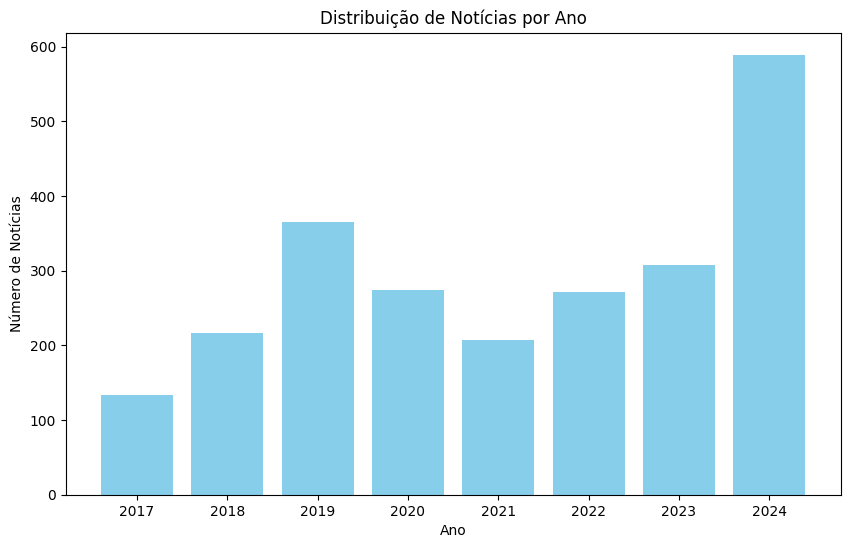

In [ ]:
data_dir = pathlib.Path("data")


year_counter = Counter()


dates_processed = []


for json_file in data_dir.rglob("*.json"):
    with json_file.open("r", encoding="utf-8") as f:
        data = json.load(f)
        raw_date = data.get("data", "")  
        if raw_date:
            try:
                year = datetime.fromisoformat(raw_date).year
                year_counter[year] += 1
                dates_processed.append(raw_date)  
            except ValueError:
                print(f"Formato de data inválido no arquivo {json_file.name}: {raw_date}")


print("Datas processadas:", dates_processed)


sorted_years = sorted(year_counter.items())


if sorted_years:
    years, counts = zip(*sorted_years)

    # Plotando o gráfico
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 6))
    plt.bar(years, counts, color="skyblue")
    plt.title("Distribuição de Notícias por Ano")
    plt.xlabel("Ano")
    plt.ylabel("Número de Notícias")
    plt.xticks(years)
    plt.show()
else:
    print("Nenhuma data válida foi encontrada.")


## 

Após fazermos o download das materias, podemos plotar a sua volumetria por ano, na qual com base no gráfico vemos um crescimento desde 2017 relativamente constante, porém vemos um aumento significativo em 2019, seguido por uma leve queda em 2021, possivelmente influenciada por eventos externos como a pandemia de COVID-19. A partir de 2022, observa-se uma recuperação e crescimento contínuo, indicando uma retomada das atividades. Já no ano de 2024, vemos um maior volume de notícias, refletindo em um crescimento e amadurecimento do portal, aliado à ampliação das iniciativas de divulgação de informações por parte da instituição responsável.



Meses processados: ['Maio', 'Fevereiro', 'Agosto', 'Julho', 'Agosto', 'Janeiro', 'Julho', 'Agosto', 'Setembro', 'Abril', 'Janeiro', 'Setembro', 'Setembro', 'Outubro', 'Fevereiro', 'Abril', 'Julho', 'Julho', 'Julho', 'Abril', 'Setembro', 'Junho', 'Dezembro', 'Outubro', 'Fevereiro', 'Julho', 'Setembro', 'Abril', 'Abril', 'Fevereiro', 'Julho', 'Fevereiro', 'Novembro', 'Fevereiro', 'Junho', 'Fevereiro', 'Dezembro', 'Dezembro', 'Junho', 'Outubro', 'Maio', 'Dezembro', 'Abril', 'Setembro', 'Julho', 'Fevereiro', 'Outubro', 'Novembro', 'Março', 'Abril', 'Janeiro', 'Abril', 'Março', 'Fevereiro', 'Junho', 'Novembro', 'Julho', 'Agosto', 'Janeiro', 'Novembro', 'Abril', 'Setembro', 'Maio', 'Agosto', 'Julho', 'Dezembro', 'Outubro', 'Abril', 'Setembro', 'Janeiro', 'Junho', 'Julho', 'Julho', 'Novembro', 'Novembro', 'Dezembro', 'Outubro', 'Julho', 'Setembro', 'Julho', 'Abril', 'Novembro', 'Setembro', 'Maio', 'Abril', 'Dezembro', 'Janeiro', 'Março', 'Outubro', 'Setembro', 'Abril', 'Fevereiro', 'Fevereiro

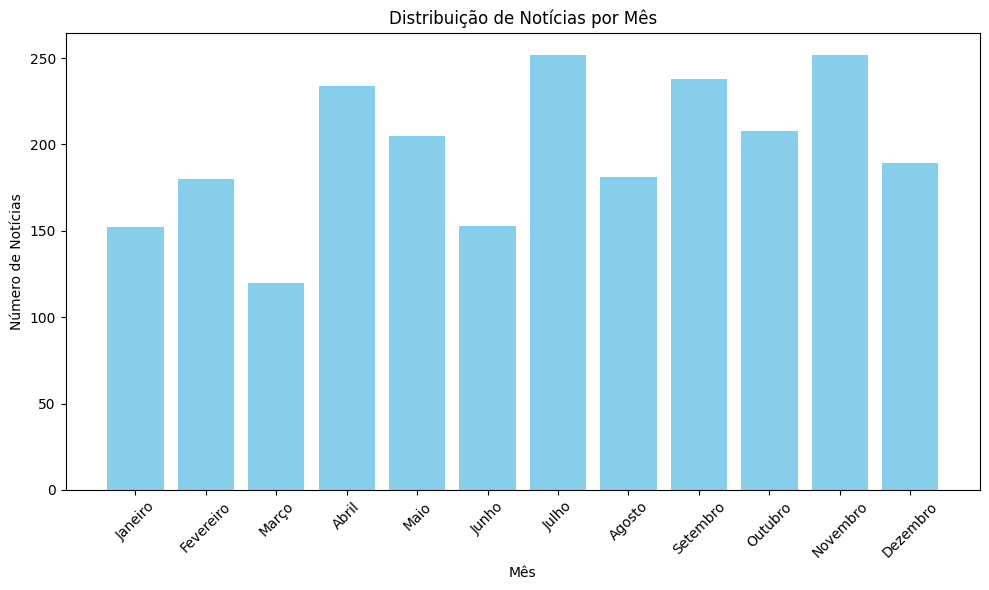

In [ ]:
locale.setlocale(locale.LC_TIME, "pt_BR.UTF-8") 



data_dir = pathlib.Path("data")


month_counter = Counter()


dates_processed = []

for json_file in data_dir.rglob("*.json"):
    with json_file.open("r", encoding="utf-8") as f:
        data = json.load(f)
        raw_date = data.get("data", "")  
        if raw_date:
            try:
                month = datetime.fromisoformat(raw_date).strftime("%B").capitalize()  
                month_counter[month] += 1
                dates_processed.append(month)  # Salvar data para diagnóstico
            except ValueError:
                print(f"Formato de data inválido no arquivo {json_file.name}: {raw_date}")

print("Meses processados:", dates_processed)


ordered_months = [
    "Janeiro", "Fevereiro", "Março", "Abril", "Maio", "Junho", 
    "Julho", "Agosto", "Setembro", "Outubro", "Novembro", "Dezembro"
]

sorted_months = [(month, month_counter[month]) for month in ordered_months if month in month_counter]

if sorted_months:
    months, counts = zip(*sorted_months)


    plt.figure(figsize=(10, 6))
    plt.bar(months, counts, color="skyblue")
    plt.title("Distribuição de Notícias por Mês")
    plt.xlabel("Mês")
    plt.ylabel("Número de Notícias")
    plt.xticks(rotation=45)  
    plt.tight_layout()
    plt.show()
else:
    print("Nenhuma data válida foi encontrada.")


##

Em seguida, fizemos um histograma para analisar e auxiliar na identificação de padrões sazonais de comunicação e no planejamento estratégico para uniformizar ou intensificar a publicação em períodos menos movimentados. E com base no histograma, temos um indicativo de que temoss um volume mais elevado de notícias em meses como agosto, setembro e novembro, porém nos meses de março e junho apresentam menor número de publicações, possivelmente refletindo sazonalidade ou períodos de menor atividade.

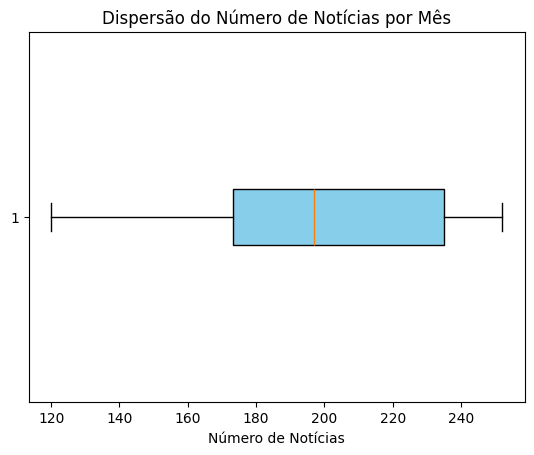

In [ ]:
#Boxplot da volumetria de noticiass
plt.boxplot(month_counter.values(), vert=False, patch_artist=True, boxprops=dict(facecolor="skyblue"))
plt.title("Dispersão do Número de Notícias por Mês")
plt.xlabel("Número de Notícias")
plt.show()


##

Podemos também plotar o boxplot do número de notícias na qual com base no gráfico, temos um indicativo de que a mediana está em torno dos 200, e com vase nos limites inferiores e superiores, temos que a maioria dos meses concentra-se entre aproximadamente 180 e 220 notícias. A ausência de outliers no boxplot reflete uma distribuição geral estável, mas o histograma revela nuances importantes, como os meses de maior atividade de publicação. Assim, ambos os gráficos sugerem que, apesar da consistência geral no volume mensal de notícias, há meses com destaque acima da média devido a fatores sazonais ou temáticos.

In [ ]:
data_dir = pathlib.Path("data")


word_counter = Counter()

## Aqui precisei usar o Gpt pra ver como tirar essas palavras do título e pegar palavras mais importantes.
stopwords = {
    "de", "e", "do", "da", "em", "para", "o", "a", "os", "as", 
    "um", "uma", "é", "com", "por", "não", "que", "|", "ibge", 
    "agência", "notícias", "na", "no", "dos", "das", "se"
}

# Processar os arquivos JSON
for json_file in data_dir.rglob("*.json"):
    with json_file.open("r", encoding="utf-8") as f:
        data = json.load(f)
        titulo = data.get("titulo", "")
        palavras = titulo.lower().split()
        palavras_filtradas = [palavra for palavra in palavras if palavra not in stopwords]
        word_counter.update(palavras_filtradas)


print(word_counter.most_common(10))  


[('alta', 216), ('censo', 213), ('inflação', 178), ('produção', 165), ('indústria', 152), ('maior', 134), ('milhões', 127), ('cresce', 126), ('mais', 116), ('industrial', 116)]


##

Como eu não tive "tags", utilizei esse código (com a ajuda de algumas referencias) e consegui extrair as palavras mais frequêntes dos títulos.
Com isso, vi que estamos em um momento crítico de inflação, dado que o dollar está quase 7 reais, e decidi seguir uma breve análise com essa palavra.

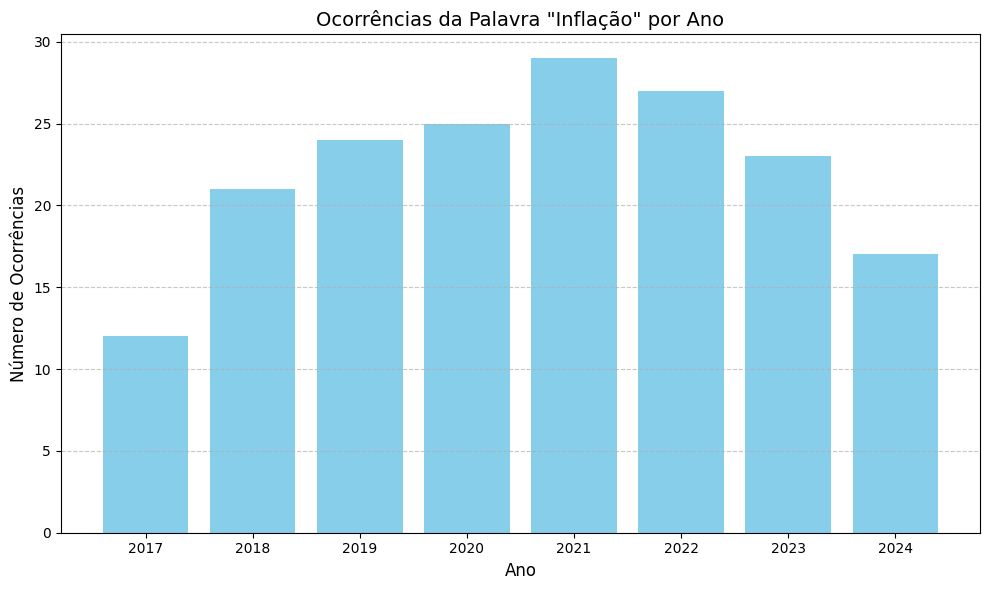

In [ ]:
data_dir = pathlib.Path("data")


inflacao_por_ano = defaultdict(int)


for json_file in data_dir.rglob("*.json"):
    with json_file.open("r", encoding="utf-8") as f:
        data = json.load(f)
        titulo = data.get("titulo", "").lower()
        raw_date = data.get("data", "")  

        if "inflação" in titulo and raw_date:
            try:
                year = datetime.fromisoformat(raw_date).year  
                inflacao_por_ano[year] += 1
            except ValueError:
                print(f"Formato de data inválido no arquivo {json_file.name}: {raw_date}")


anos = sorted(inflacao_por_ano.keys())
contagens = [inflacao_por_ano[ano] for ano in anos]


plt.figure(figsize=(10, 6))
plt.bar(anos, contagens, color="skyblue")
plt.title('Ocorrências da Palavra "Inflação" por Ano', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Número de Ocorrências', fontsize=12)
plt.xticks(anos)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##

Durante o governo Lula (2023-2024), o tema da inflação continuou sendo relevante, especialmente considerando o impacto de um dólar elevado, próximo a R$ 7. No governo Bolsonaro (2019-2022), a inflação foi um tema amplamente discutido, especialmente em um contexto de pandemia e crises globais, o que pode justificar o maior número de ocorrências nesse período. Vale lembrar que a diferença entre os dois governos não necessariamente reflete uma variação no impacto real da inflação, mas sim como ela foi comunicada e debatida publicamente. Mesmo com menos menções em 2024, o impacto da inflação continua evidente no cotidiano, afetando diretamente o poder de compra em geral.
